# 택시 요금 데이터 살펴보기
이번 시간에는 택시 요금(Fare) 예측 데이터를 바탕으로 탐색적 데이터 분석을 해보도록 하겠습니다.

해당 데이터는 탑승자 정보를 바탕으로 택시 요금을 예측하는 것을 목표로 만들어진 데이터셋 이며, 탑승자 정보에는 '탑승 일시’와 ‘승차 위치’, ‘하차 위치’, ‘탑승자 수’ 등의 정보를 포함하고 있습니다.

데이터는 자체 제작된 데이터이며, 변수 이름은 케글(Kaggle)의 "New York Taxi Fair Prediction"을 참고하였습니다.
(https://www.kaggle.com/c/new-york-city-taxi-fare-prediction)

유용한 함수들

pd.DataFrame.info(): 데이터 프레임 내의 데이터들의 정보를 요약적으로 표시하여 줍니다.
실습
pandas를 이용하여 ‘data.csv’ 데이터를 불러옵니다.

numpy를 이용하여 (리스트)데이터의 통계적 정보를 추출합니다.

‘data.csv’ 내의 ‘fare_amount’ 변수(컬럼)에 대한 통계적 정보를 출력하고, 그 의미를 살펴봅시다.

‘data.csv’ 내의 ‘passenger_count’ 변수(컬럼)에 대한 통계적 정보를 출력하고, 그 의미를 살펴봅시다.

In [2]:
import pandas as pd
import numpy as np

DATA_PATH = './data/texidata.csv'

def load_csv(path):
    # pandas를 이용하여 'data.csv' 데이터를 불러옵니다.
    data_frame = pd.read_csv(path)
    return data_frame

def statistical_features(data):
    # numpy를 이용하여 (리스트)데이터의 통계적 정보를 추출합니다.
    
    _min = np.min(data)
    _max = np.max(data)
    _mean = np.mean(data)
    _median = np.median(data)
    _var = np.var(data)
    _std = np.std(data)
    
    return _min, _max, _mean, _median, _var, _std


df=load_csv(DATA_PATH)
#전체 데이터에 대한 요약 정보를 살펴봅니다.
df.info()
#'fare_amount'변수에 대한 통계적 정보를 살펴봅니다.
_min, _max, _mean, _median, _var, _std = statistical_features(df.fare_amount)
print('fare_amount 의', '최솟값:', _min ,'최댓값:', _max ,'평균값:', _mean ,'중앙값:', _median ,'분산값:', _var ,'표준편차값:', _std)

#'passenger_count'변수에 대한 통계적 정보를 살펴봅니다.
_min, _max, _mean, _median, _var, _std = statistical_features(df.passenger_count)
print('passenger_count 의', '최솟값:', _min ,'최댓값:', _max ,'평균값:', _mean ,'중앙값:', _median ,'분산값:', _var ,'표준편차값:', _std)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Unnamed: 0           1000 non-null int64
id                   1000 non-null int64
pickup_datetime      1000 non-null object
pickup_latitude      1000 non-null int64
pickup_longitude     1000 non-null int64
dropoff_latitude     991 non-null float64
dropoff_longitude    992 non-null float64
passenger_count      1000 non-null int64
fare_amount          1000 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 70.4+ KB
fare_amount 의 최솟값: -100 최댓값: 99 평균값: 45.102 중앙값: 48.0 분산값: 1147.2855959999995 표준편차값: 33.871604567838226
passenger_count 의 최솟값: -2 최댓값: 5 평균값: 1.424 중앙값: 1.0 분산값: 5.1902239999999775 표준편차값: 2.2782063119919536


# 누락 데이터 탐지 및 제거
실제 또는 그를 반영한 데이터에는 누락된 데이터가 존재하는데, 이를 ‘누락 데이터(Missing Data)’ 라 합니다.

누락된 데이터는 데이터 간의 관계를 찾아내는 머신러닝의 과정에서 부정적인 결과를 초래할 우려가 크기 때문에, 제거하는 것이 바람직합니다.

이번 시간에는 누락된 데이터를 확인하고 이를 제거하는 방법에 대해 알아봅시다.

### 유용한 함수들

set(list_x): list_x를 값이 중복되지 않으며 순서가 없는 set (집합)형태로 변환합니다.

pd.isna(x) / pd.isnull(x): 데이터 x 가 누락된 데이터이면 True, 아니면 False를 출력합니다.

pd.DataFrame.drop(colums = 'a'): 'a’열을 삭제한 DataFrame을 반환합니다.

pd.DataFrame.drop(index = 'a'): 'a’행을 삭제한 DataFrame을 반환합니다.

### 실습
pandas를 이용하여 데이터를 DataFrame의 형태로 불러옵니다.

pandas의 함수를 이용하여 Null값 또는 NaN 값을 찾고, 그 값의 인덱스를 index_remove에 추가합니다.

index_remve의 인덱스들에 해당하는 df_data의 행을 제거합니다.

결측 값을 제거한 후의 DataFrame의 정보를 확인합니다.

In [3]:
DATA_PATH = './data/texidata.csv'
data=pd.read_csv(DATA_PATH)

# pandas를 이용하여 데이터를 DataFrame의 형태로 불러옵니다.
df=pd.DataFrame(data=pd.read_csv(DATA_PATH)) 

print("누락된 데이터(Missing Data)를 제거하기 전의 데이터 정보")
df.info()


def remove_NaN(df_data):
    index_remove=[]
    for key in df_data.keys():
        for i, data in enumerate(df_data[key]):
            # pandas의 함수를 이용하여 Null값 또는 NaN 값을 찾고, 그 값의 인덱스를 index_remove에 추가
            if pd.isna(data):
                index_remove.append(i)
    index_remove = list(set(index_remove))
    #index_remove의 인덱스들에 해당하는 df_data의 행을 제거합니다.
    
    removed_data = pd.DataFrame.drop(df_data, index=index_remove)
    return removed_data
    
# 누락된 데이터를 제거한 후의 DataFrame의 정보를 확인합니다.
removed_df=remove_NaN(df)
print("\n누락된 데이터(Missing Data)를 제거한 후의 데이터 정보")
removed_df.info()
removed_df.to_csv('./data/re_texidata.csv')

누락된 데이터(Missing Data)를 제거하기 전의 데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Unnamed: 0           1000 non-null int64
id                   1000 non-null int64
pickup_datetime      1000 non-null object
pickup_latitude      1000 non-null int64
pickup_longitude     1000 non-null int64
dropoff_latitude     991 non-null float64
dropoff_longitude    992 non-null float64
passenger_count      1000 non-null int64
fare_amount          1000 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 70.4+ KB

누락된 데이터(Missing Data)를 제거한 후의 데이터 정보
<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 9 columns):
Unnamed: 0           991 non-null int64
id                   991 non-null int64
pickup_datetime      991 non-null object
pickup_latitude      991 non-null int64
pickup_longitude     991 non-null int64
dropoff_latitude     991 non-null float64
dropoff_longitude    991 non-null flo

# 이상치(Outlier) 제거
실제 또는 그를 반영한 데이터에서는 특정 값이 평균적인 범위를 벗어나거나 잘못 기록되는 경우가 빈번하게 발생합니다.

이러한 값을 '이상치(Outlier)'라고 하는데, 이상치 역시 누락 데이터와 마찬가지로 머신러닝의 과정에서 부정적인 결과를 초래할 우려가 크기 때문에, 제거하는 것이 바람직합니다.

이번 시간에는 이러한 이상치를 찾아내고 제거하는 방법을 알아보도록 합니다.

이상치를 가지고 있는 데이터
’fare amount’, ‘passenger_count’ 내 음수값: [실습 3-1] 에서 살펴본 통계적 정보에 의하면, 해당 변수는 음수값을 가지고 있다. 이는 잘못 기입된 데이터일 가능성이 큽니다.

’타는 곳’과 '내리는 곳’의 위치가 같은 경우: 데이터를 살펴보면 '타는 곳’과 '내리는 곳’의 위치가 같은 경우가 있는데, 이는 잘못 기록된 데이터일 가능성이 큽니다.

## 실습
리스트를 입력으로 받아서 해당 리스트 내에 음수값이 있으면 그 위치(인덱스)들을 리스트로 출력하는 함수를 만듭니다.

DataFrame 내에 제거해야 하는 이상치의 인덱스를 반환하는 함수를 만듭니다.

인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만듭니다.

In [4]:
'''
DATA_PATH ='./data/re_texidata.csv'

#데이터를  DataFram의 형태로 불러옵니다.
df=pd.read_csv(DATA_PATH, quoting=3)
'''
df=removed_df.set_index(np.arange(len(removed_df.index)))

#불러온 DataFrame의 각 인덱스의 값들을 변수로 저장합니다.
fare_amount = df['fare_amount']
passenger_count = df['passenger_count']
pickup_longitude = df['pickup_longitude']
pickup_latitude=df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']

# 1.리스트를 입력으로 받아서 해당 리스트 내에 음수값이 있으면 그 위치(인덱스)들을 리스트로 출력하는 함수를 만듭니다.  
def get_negative_index(list_data):
    neg_idx=[]
    
    for i, value in enumerate(list_data):
        ## 음수값이 있으면 그 위치(인덱스)들을 neg_idx로 추가시킵니다.
        if value < 0:
            neg_idx.append(i)
            
    return neg_idx


# 2.DataFrame 내에 제거해야 하는 이상치의 인덱스를 반환하는 함수를 만듭니다.
def outlier_index():

    # get_negative_index() 함수를 통해서,
    #fare_amount와 passenger_count 내의 음수값들의 인덱스를 반환합니다.
    idx_fare_amount = get_negative_index(fare_amount)
    idx_passenger_count = get_negative_index(passenger_count)
    
    idx_zero_distance=[]    
    idx= [i for i in range(len(passenger_count))]
    zipped = zip(idx, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
    
    for i, x, y, _x, _y in zipped:
    
        # 타는 곳(pickup_longitude,pickup_latitude)과 내리는 곳(drop_longitude, drop_latitude)이
        # 같은 데이터의 인덱스를 idx_zero_distance에 저장합니다.
        if x == _x and y == _y :
            idx_zero_distance.append(i)
    
    # 제거해야하는 인덱스의 리스트들(idx_fare_amount,idx_passenger_count,idx_zero_distance)
    # 간의 중복을 없앤 리스트를 만들어줍니다.
    total_index4remove = list(set(idx_fare_amount+idx_passenger_count+idx_zero_distance))
    
    return total_index4remove
    

# 3.인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만듭니다.
def remove_outlier(dataframe, list_idx):
    newdataframe = pd.DataFrame.drop(dataframe,index = list_idx)
    return newdataframe

## 이상치 제거하기 전의 데이터 정보를 확인해 봅시다.

df.info()

## 이상치를 제거합니다.
remove_index = outlier_index()
new=remove_outlier(df, remove_index)

##이상치를 제거한 후의 데이터를 살펴봅니다.
new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 990
Data columns (total 9 columns):
Unnamed: 0           991 non-null int64
id                   991 non-null int64
pickup_datetime      991 non-null object
pickup_latitude      991 non-null int64
pickup_longitude     991 non-null int64
dropoff_latitude     991 non-null float64
dropoff_longitude    991 non-null float64
passenger_count      991 non-null int64
fare_amount          991 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 77.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 1 to 989
Data columns (total 9 columns):
Unnamed: 0           713 non-null int64
id                   713 non-null int64
pickup_datetime      713 non-null object
pickup_latitude      713 non-null int64
pickup_longitude     713 non-null int64
dropoff_latitude     713 non-null float64
dropoff_longitude    713 non-null float64
passenger_count      713 non-null int64
fare_amount          713 non-null int64

# 데이터를 변형하기
기존의 데이터에서 ‘pickup_datetime’ 변수의 경우, 데이터가 ‘2009-06-15 17:26:21 UTC’ 와 같은 형태로 되어 있습니다.

연도, 월, 일에 따라 택시 요금이 영향을 받을 수 있다고 판단할 경우, 이를 각각의 변수로 취급해야할 필요가 있습니다.

이번 시간에는 기존 'pickup_datetime '라는 변수를 연도, 월, 일, 시로 나누고 숫자의 형태로 변수를 만들어 보도록 합시다.

### 연, 월, 일을 분리하는 것이 적합한 경우

연도별로 택시 기본요금이 변화할 것으로 예상될 경우.
월(month)에 따라 성수기/비성수기가 있을 것으로 예상될 경우.
일(day)에 따라 교통체증의 정도가 다를 것으로 예상될 경우 등
유용한 함수들

str_x.split(): 문자열 str_x를 공백으로 분리한 다음 분리된 값들을 리스트 형태의 값으로 반환합니다. (예, “아버지가 방에”.split() -> [‘아버지가’, ‘방에’] )
str_x.split(s): 문자열 str_x를 문자열 ‘s’ 로 분리한 다음 분리된 값들을 리스트 형태의 값으로 반환합니다. (예, “아버지가 방에”.split(‘가’) -> [‘아버지’, ’ 방에’] )
### 실습
연월일(‘YYYY-MM-DD’)와 시간(‘HH:MM:SS’)로 나누어 주고 이를 year_date, time 변수로 각각 넣어줍니다.

연월일 변수에서 각각의 ‘연도’, ‘월’, '일’을 추출하여 years, months, days 변수에 넣어줍니다.

시간만 따로 int의 형태로 추출합니다.

각 변수의 상위 10개 씩만 출력해서 출력이 제대로 되었는지 확인해봅시다.

In [5]:
df=new.set_index(np.arange(len(new.index)))

#불러온 pickup_datetime은 ['2009-06-15 17:26:21 UTC', ...] 과 같은 형태를 지니고 있습니다.
pickup_datetime = df['pickup_datetime'] 
year_date=[]
time=[]

# 우선 연월일('YYYY-MM-DD')와 시간('HH:MM:SS')로 나누어 주고 이를 year_date, time 변수로 각각 넣어줍니다.
for i in pickup_datetime:
    year_date.append(i.split()[0])
    time.append(i.split()[1])

##############################
years=[]
months=[]
days=[]

#연월일 변수에서 각각의 '연도', '월', '일'을 추출하여 years, months, days 변수에 넣어줍니다.
for i in year_date:
    years.append(i.split('-')[0])
    months.append(i.split('-')[1])
    days.append(i.split('-')[2])

####################################
#시간만 따로 int의 형태로 추출합니다.
hours=[]
for i in time:
    hours.append(int(i.split(':')[0]))

#각 변수의 상위 10개 씩만 출력해서 출력이 제대로 되었는지 확인해봅시다.
print(years[:10])
print(months[:10])
print(days[:10])
print(hours[:10])

['2015', '2017', '2015', '2015', '2017', '2015', '2015', '2017', '2017', '2015']
['10', '04', '04', '03', '04', '09', '08', '10', '03', '01']
['21', '11', '26', '04', '24', '15', '15', '03', '26', '15']
[22, 16, 3, 14, 6, 20, 22, 6, 14, 5]


# 데이터 시각화
그래프를 통해 데이터를 탐색하는 것은 데이터의 특징을 직관적으로 파악할 수 있다는 장점이 있습니다.

이번 시간에는 Matplotlib을 활용하여 이전 시간까지 다루었던 데이터를 그래프로 표현해보도록 합니다.

### 시각화 할 데이터

요금(fare_amount)과 거리(distance): 요금과 거리 간의 비례하는 상관관계가 있을 것으로 판단하고 그 둘을 바탕으로 그래프를 표시합니다.
거리 설정: 구체에서의 거리를 계산하는 식(Haversine Formula)으로 거리를 정의하고 거리함수를 설정합니다.
### 실습
distance 함수를 이용하여 각각의 타는 곳과 내리는 곳 간의 거리를 계산하여, 이를 리스트로 만들어봅시다.

Subplots를 활용하여 1행 1열의 figsize가 (16,12)인 그래프(셋)를 만듭니다.

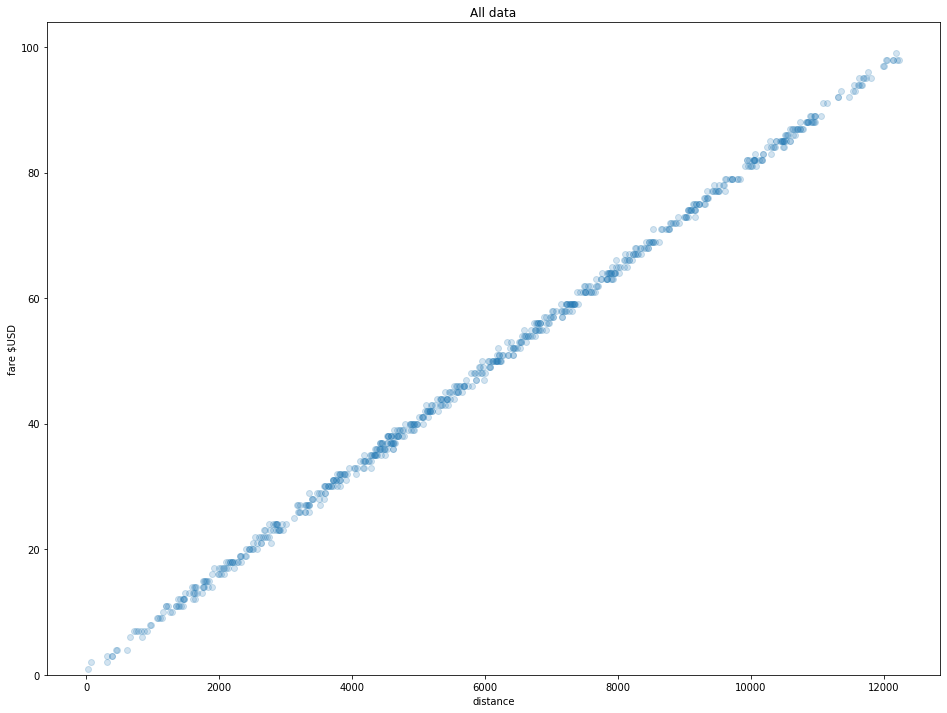

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("Agg")

# df = pd.read_csv('./data/re_texidata.csv', quoting=3)

pickup_longitude = df['pickup_longitude']
pickup_latitude = df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']

def distance(pick_lat, pick_lon, drop_lat, drop_lon):
    p = 0.0174 ## Pi/180
    ## Haversine Formula
    a = 0.5 - np.cos((drop_lat - pick_lat) * p)/2 + np.cos(pick_lat * p) * np.cos(drop_lat * p) * (1 - np.cos((drop_lon - pick_lon) * p)) / 2
    return 0.621 * 12742 * np.arcsin(np.sqrt(a))

#1.distance 함수를 이용하여 각각의 타는 곳(pickup_longitude, pickup_latitude)과 내리는 곳(dropoff_longitude, dropoff_latitude) 간의 거리를 계산하여, 이를 리스트로 만들어봅시다.
list_distance = distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude)

#만들어진 거리를 DataFrame 내에 추가합니다.
df['distance'] = list_distance


#2.subplots를 활용하여 1행 1열의 figsize가 (16,12)인 그래프를 만듭니다.
fig, axs = plt.subplots(1, 1, figsize=(16, 12))

axs.scatter(df.distance, df.fare_amount, alpha=0.2)
axs.set_xlabel('distance')
axs.set_ylim(0,)
axs.set_ylabel('fare $USD')
axs.set_title('All data')

# plt.savefig("result.png")

fig

# 미션! 데이터 분석 해보기
지금까지 데이터의 특징을 파악하고 분석하는 방법들을 살펴보았습니다.

이번 시간에는 'id’와 그에 대응되는 ‘english’, ‘math’, ‘korean’, ‘ethics’ 의 점수가 기록된 데이터를 바탕으로 누락된 값을 제거하고, 이상치를 제거해보도록 합시다.


이상치(outlier): ‘english’, ‘math’, ‘korean’, 'ethics’의 값이 0(점)보다 작거나 100(점)보다 큰 경우를 이상치로 정의합니다.
### 미션
pandas를 사용하여 데이터를 로드하고 이를 반환하는 함수를 만들어 보세요.

DataFrame 내의 누락된 데이터를 찾고, (인덱스를 바탕으로) 이를 제거하는 함수를 만들어 보세요.

데이터의 최솟값, 최댓값, 평균값(순서대로)을 반환하는 함수를 Numpy를 이용하여 만들어 보세요.

이상치(0보다 작거나 100보다 큰 데이터)를 찾고 이에 대응되는 인덱스를 반환하는 함수를 만들어 보세요.

인덱스를 기반으로 DataFrame 내의 (행)데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만들어 보세요.

In [116]:
import numpy as np
import pandas as pd

DATA_PATH = './data/testscore.csv'

#1.pandas를 사용하여 데이터를 로드하고 이를 반환하는 함수를 만들어 보세요.
def load_csv(path):
    data_frame = pd.read_csv(path)
    return data_frame
    
#2.DataFrame 내의 누락된 데이터를 찾고,(그 인덱스를 바탕으로) 이를 제거하는 함수를 만들어 보세요.
def remove_NaN(df_data):
    index_remove=[]    
    for key in df_data.keys():
        for i, data in enumerate(df_data[key]):
            # pandas의 함수를 이용하여 Null값 또는 NaN 값을 찾고, 그 값의 인덱스를 index_remove에 추가
            if pd.isna(data):
                index_remove.append(i)
    index_remove = list(set(index_remove))
    #index_remove의 인덱스들에 해당하는 df_data의 행을 제거합니다.
    
    removed_data = pd.DataFrame.drop(df_data, index=index_remove)
    return removed_data
    
#3.데이터의 최솟값, 최댓값, 평균값(순서대로)을 반환하는 함수를 Numpy를 이용하여 만들어 보세요.
def statistical_features(data):
    _min = np.min(data)
    _max = np.max(data)
    _mean = np.mean(data)
    return _min, _max, _mean 

#4.이상치를 찾고 이에 대응되는 인덱스를 반환하는 함수를 만들어 보세요.


def outlier_index(df):

    idx_outlier=[]
    for i,score in enumerate(df):
        ## 음수값이 있으면 그 위치(인덱스)들을 neg_idx로 추가시킵니다.
        if int(score) < 0 or int(score)>100:
            idx_outlier.append(i)
            
    return idx_outlier


#5.인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만들어 보세요.
def remove_outlier(dataframe, list_idx):
    removed_df = pd.DataFrame.drop(dataframe,index=list_idx)
    return removed_df

def main():
    # 데이터를 로드합니다.
    df = load_csv(DATA_PATH)
    # 누락된 값을 제거합니다.
    nan_rm_df = remove_NaN(df)
    #제거후 index 재조합
    nan_rm_df=nan_rm_df.set_index(np.arange(len(nan_rm_df.index)))
    # 제거가 잘 되었는지 확인합니다.('실행'시에만)
    #nan_rm_df.info()
    
    # english,math, korean, ethics에 대한 통계적 정보를 변수로 저장합니다.
    stat_eng = statistical_features(nan_rm_df['english'])
    stat_math = statistical_features(nan_rm_df['math'])
    stat_kor = statistical_features(nan_rm_df['korean'])
    stat_eths = statistical_features(nan_rm_df['ethics'])
    
    #이상치(0보다 작거나 100보다 큰 데이터)를 가진 데이터의 DataFrame 내의 인덱스(위치)를 리스트로 각각 저장합니다. 
    idx_outlier_eng = outlier_index(nan_rm_df['english'])
    idx_outlier_math = outlier_index(nan_rm_df['math'])
    idx_outlier_kor = outlier_index(nan_rm_df['korean'])
    idx_outlier_eths = outlier_index(nan_rm_df['ethics'])
    
    #이상치를 가진 데이터의 위치 인덱스를 중복이 없는 리스트가 되도록 변환합니다.
    idx_outlier_total = list(set(idx_outlier_eng+idx_outlier_math+idx_outlier_kor+idx_outlier_eths))
    
    #이상치의 인덱스(리스트)를 기준으로 DataFrame 내의 행 데이터를 제거하고 이를 변수로 저장합니다.
    removed_df = remove_outlier(nan_rm_df,idx_outlier_total)
    
    #제거가 잘 되었는지 확인합니다.('실행'시에만)
    #=removed_df.info()
#     print(removed_df)
    return stat_eng, idx_outlier_eng, idx_outlier_math, idx_outlier_kor, idx_outlier_eths, removed_df

main()


((0.0, 100.0, 52.641304347826086),
 [],
 [7, 18, 42],
 [12],
 [8, 56],
        id  english  math  korean  ethics
 0   10000      0.0  56.0    19.0    81.0
 1   10001     59.0  48.0    35.0    90.0
 2   10002     83.0  75.0    17.0    86.0
 3   10003     71.0  51.0    30.0     1.0
 4   10004      9.0  36.0    14.0    16.0
 5   10005     99.0  45.0    12.0     0.0
 6   10006      0.0  38.0    53.0    57.0
 9   10009     16.0  28.0    57.0    12.0
 10  10010     66.0  68.0    76.0    37.0
 11  10011     45.0  72.0    48.0    84.0
 13  10014     61.0  10.0    47.0    37.0
 14  10015     79.0  95.0    85.0    32.0
 15  10016     81.0  93.0    46.0    27.0
 16  10017     52.0  55.0    99.0    30.0
 17  10018     30.0  34.0    74.0    57.0
 19  10020     73.0  84.0    40.0    50.0
 20  10021     96.0  89.0     2.0   100.0
 21  10022     93.0  57.0     5.0    53.0
 22  10023     54.0  19.0    85.0    63.0
 23  10024     14.0  66.0    19.0    85.0
 24  10025     46.0  12.0    11.0    75.0
 25  